In [83]:
%matplotlib inline

In [84]:
from colour.plotting import *
import colour
import colour.plotting
import colour.io
import PIL
import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import array, zeros, linspace, float64, savetxt
from scipy import interpolate, vectorize
from scipy.signal import argrelextrema, argrelmax, savgol_filter, resample
from sklearn.preprocessing import normalize
from itertools import izip
import csv

In [85]:
#print(dir(colour))
#print(help(colour.xyY_to_XYZ))

In [86]:
img = PIL.Image.open("DSC_0066.JPG") # change name of your file
#imgmp = mpimg.imread('DSC_0064.JPG')

In [87]:
print(img.format, img.size, img.mode)

JPEG (3840, 2160) RGB


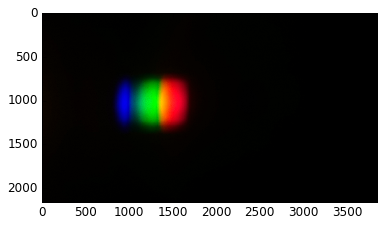

In [88]:
#img.show()
plt.imshow(np.asarray(img))

In [89]:
greyscale_img = img.convert("LA")
print(greyscale_img.format, greyscale_img.size, greyscale_img.mode)
greyscale_img.getextrema()

None (3840, 2160) LA


((0, 195), (255, 255))

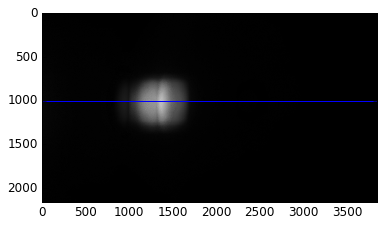

In [90]:
plt.imshow(greyscale_img)
plt.axhline(1000) # change to the line you need to sample

In [91]:
pixels = greyscale_img.load()

In [92]:
pix = array(greyscale_img)

In [93]:
pix.shape, pix.ndim

((2160, 3840, 2), 3)

In [95]:
data_row = pix[1000] # sample at specific row / horizontal line

In [96]:
numpy.take(data_row,0,1)[100:2000]

array([5, 6, 7, ..., 2, 2, 2], dtype=uint8)

3840


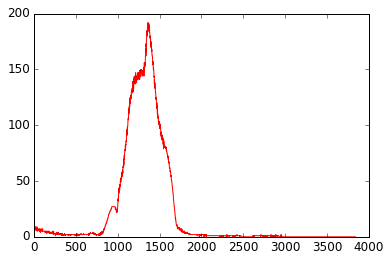

In [97]:
#plt.plot(numpy.take(pix[1100],0,1)[100:2000])
spectrum = numpy.take(data_row,0,1)
print(len(spectrum))
plt.plot(spectrum)

In [101]:
trimLeft = 700 # change this for calibration
trimRight = 1900 # change this for calibration
x = np.linspace(trimLeft,trimRight,trimRight-trimLeft+1)
#print(x)
#print(x)
#newSpectrum = interpolate.InterpolatedUnivariateSpline(x,spectrum,k=2)
#newX = interpolate.InterpolatedUnivariateSpline(x,x,k=2)
newSpectrum = savgol_filter(spectrum, 101, 2)
#plt.plot(newSpectrum)
normalizedSpectrum = normalize(newSpectrum[trimLeft:trimRight+1],'max').reshape(-1,1)
resampledSpectrum = resample(normalizedSpectrum,730-380+1)
#print(resampledSpectrum)


/Users/francesco.anselmo/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


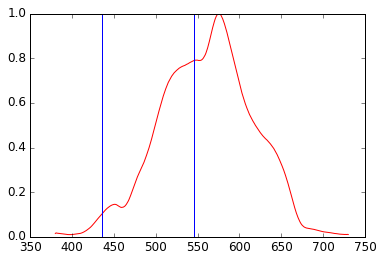

In [102]:
xx = np.linspace(380,730,730-380+1)
#print(len(xx), len(resampledSpectrum))

plt.plot(xx,resampledSpectrum) # trim spectrum

# second blue wavelength is 436 nm, green wavelength is 546 nm
plt.axvline(x=436)
plt.axvline(x=546)

In [103]:
spd_data = dict(izip(xx, resampledSpectrum))
#print(spd_data)

In [107]:
spd = colour.SpectralPowerDistribution(
    'LED lighting', spd_data) # change name according to name of spectrum

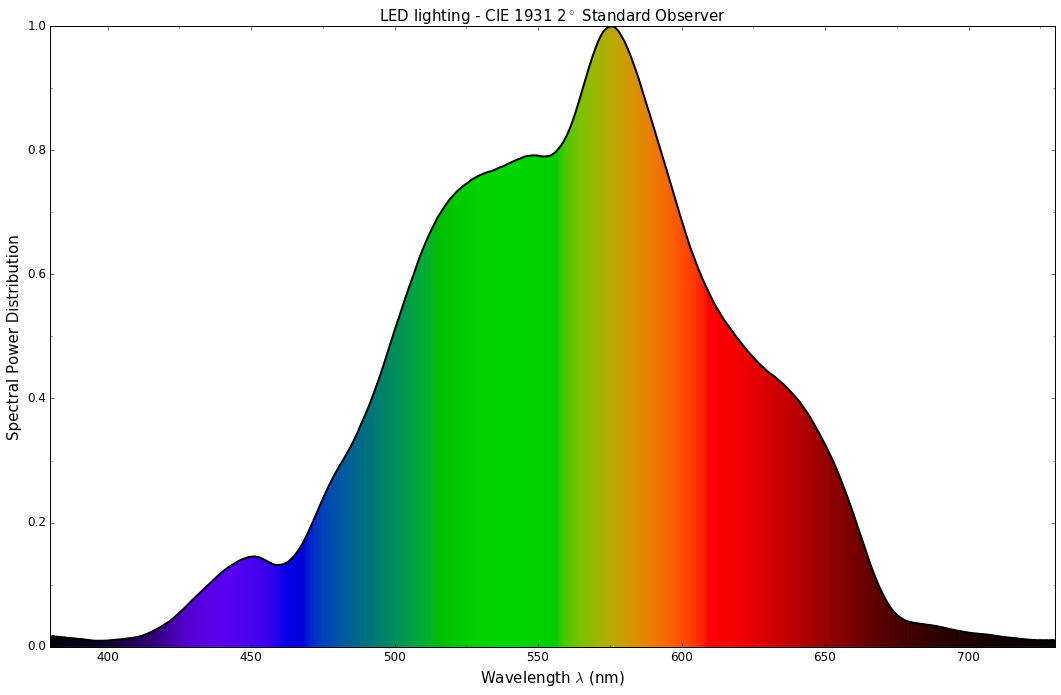

In [108]:
single_spd_plot(spd)

In [109]:
#planckian_locus_CIE_1960_UCS_chromaticity_diagram_plot(['A', 'D65', 'E'])

In [110]:
#print(dir(spd))

In [111]:
print(spd.wavelengths)

[ 380.  381.  382.  383.  384.  385.  386.  387.  388.  389.  390.  391.
  392.  393.  394.  395.  396.  397.  398.  399.  400.  401.  402.  403.
  404.  405.  406.  407.  408.  409.  410.  411.  412.  413.  414.  415.
  416.  417.  418.  419.  420.  421.  422.  423.  424.  425.  426.  427.
  428.  429.  430.  431.  432.  433.  434.  435.  436.  437.  438.  439.
  440.  441.  442.  443.  444.  445.  446.  447.  448.  449.  450.  451.
  452.  453.  454.  455.  456.  457.  458.  459.  460.  461.  462.  463.
  464.  465.  466.  467.  468.  469.  470.  471.  472.  473.  474.  475.
  476.  477.  478.  479.  480.  481.  482.  483.  484.  485.  486.  487.
  488.  489.  490.  491.  492.  493.  494.  495.  496.  497.  498.  499.
  500.  501.  502.  503.  504.  505.  506.  507.  508.  509.  510.  511.
  512.  513.  514.  515.  516.  517.  518.  519.  520.  521.  522.  523.
  524.  525.  526.  527.  528.  529.  530.  531.  532.  533.  534.  535.
  536.  537.  538.  539.  540.  541.  542.  543.  5

In [112]:

print(spd.values)

[ 0.01510414  0.01756409  0.01615178  0.01607909  0.01531282  0.01511984
  0.01441152  0.01421227  0.01357236  0.01316832  0.01253777  0.01234488
  0.01169913  0.01112289  0.01042053  0.01002803  0.0097014   0.00984894
  0.00977387  0.00990086  0.00999835  0.01051398  0.01092618  0.01135356
  0.01169014  0.01223425  0.01275064  0.01340881  0.01402372  0.01452762
  0.01536489  0.01658801  0.01794488  0.01958701  0.02140792  0.02355782
  0.02563289  0.02807519  0.03070207  0.0335913   0.03652497  0.03931151
  0.0426554   0.04642163  0.05046772  0.05468134  0.05903239  0.06350966
  0.06824605  0.07303221  0.0775254   0.08196176  0.08630233  0.09052103
  0.09493769  0.09946065  0.10388739  0.10826692  0.11251568  0.1167467
  0.12067413  0.12438928  0.12779045  0.13092125  0.13368555  0.13647954
  0.13901488  0.14108963  0.14282088  0.14414685  0.14509393  0.14557691
  0.14507607  0.14396649  0.14176524  0.13941819  0.136848    0.1344763
  0.13250899  0.13159837  0.13192938  0.13271722  0.1

In [113]:
#output_data = dict(zip(spd.wavelengths,spd.values))
#print(output_data)

In [114]:
out = csv.writer(open("led_lighting.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL) # change filename
out.writerow(spd.wavelengths)
out.writerow(spd.values)

6054